# Playing with Data And Photons in Jupyter/Python

Here's a notebook to play with the Fridge Photon Setup we built.

First let's connect to the database: 

In [1]:
from pymongo import MongoClient as mc
cli = mc("172.18.0.2")
#make sure your mongo ip is represented correctly


Now, let's get the right  collection

In [2]:
dbs = cli.list_database_names()
db = cli['MAE_519_LAB_1']
cols = db.list_collection_names()
cols.sort()
col = db[cols[0]]

## Photon Control!

To control the photon, we'll wrap a simple function around requests

In [3]:
import requests as req

ac = "" #your PARTICLE token goes here thanks

def switch(n,node=cols[0],a=ac):
    site = "https://api.particle.io/v1/devices/%s/set_state" % node
    payload = {'access_token':a,'arg':n}
    return req.post(site,payload).json()

Now let's make it hot

In [15]:
switch(1)

{u'connected': True,
 u'id': u'2f0041000e51353532343635',
 u'last_app': u'',
 u'return_value': 1}

Now let's make it cold

In [22]:
switch(2)

{u'connected': False,
 u'id': u'2f0041000e51353532343635',
 u'last_app': u'',
 u'return_value': 2}

Now let's turn it off

In [6]:
switch(0)

{u'connected': True,
 u'id': u'2f0041000e51353532343635',
 u'last_app': u'',
 u'return_value': 0}

## Photon Data

In [7]:
import pandas as pd
import time

Import pandas to have a straightforward interface to the data:

Structure a query to only get the last two hours of data

In [8]:
q = {'time':{'$gt':time.time()-8*60*60}} #2 * 60 minutes * 60 seconds = 2 hour

Pull one hour of data into a data frame

import libaries for ploting and manipulating data

In [11]:
import sys
sys.path.append("/pithy/code")
from pithy import *
%matplotlib inline
import matplotlib.dates as mdates


Now Let's plot the state and the temperature together....

TI                                 24.5
TO                                  NaN
_id            5bae53f76ab9090108a9e65b
coreid         2f0041000e51353532343635
state                                 2
tid                                1651
time                        1.53815e+09
date      2018-09-28 16:16:55.889473915
Name: 1650, dtype: object


Text(0,0.5,'Temperature (C)')

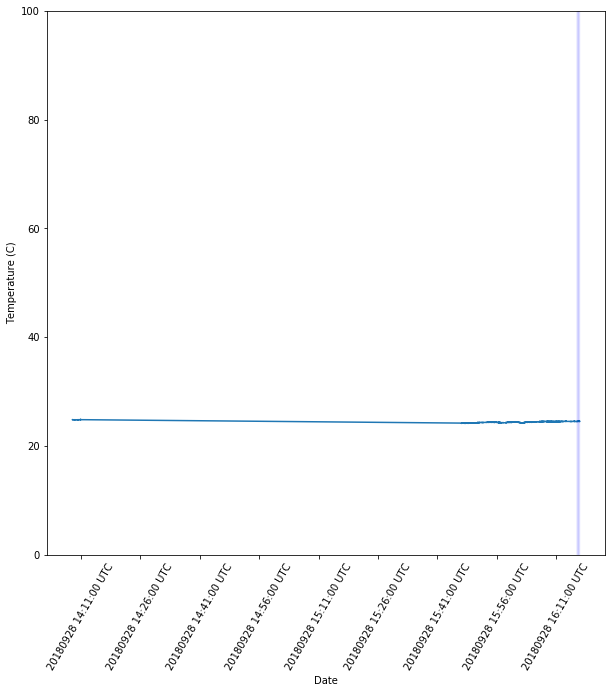

In [28]:
figure(figsize=(10, 10))
df = pd.DataFrame(list(col.find(q)))
df['date'] = pd.to_datetime(df['time'],unit='s')
plot(df['date'],df['TI'],label="Chip Temperature")
plot(df['date'],df['TO'],label="Probe Temperature")
xticks(rotation=60)
xax = plt.gca().get_xaxis()
# format major xtick label
xax.set_major_formatter(mdates.DateFormatter('%Y%m%d %H:%M:%S %Z'))

##this block needs to be more efficient
for i,d in df.iterrows():
    if d['state'] == 1:   color = 'red'
    elif d['state'] == 2: color = 'blue'
    else:                 color = None
    if color != None: 
        axvline(d['date'],0,100,color=color,alpha=.01)
print d
ylim(0,100)
xlabel("Date")
ylabel("Temperature (C)")

